In [1]:
pip show collageradiomics

Name: collageradiomics
Version: 0.3.7
Summary: Python implementation of COLLAGE texture features from BRIC & INVENTLAB.
Home-page: https://github.com/ccipd/collageradiomics
Author: ThetaTech
Author-email: robert.toth@thetatech.ai
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: mahotas, numpy, scikit-build, scikit-image, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install pandas scipy

In [1]:
import collageradiomics 
print(collageradiomics.__name__)
print(collageradiomics.__name__)

collageradiomics
collageradiomics


In [25]:
import logging
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.io
import matplotlib.pyplot as plt
import nibabel as nib
import glob
from skimage.feature import greycomatrix, greycoprops

In [26]:
h_names = []
for n in range(13):
    h_names.append(collageradiomics.HaralickFeature(n).name)

s_names = ['median', 'var', 'skew', 'kurt']

names = []
for radius in list([3,5]):
    for bines in list([4,8,16,32,64]):
        for g in range(2):
            for h in h_names:
                for s in s_names:
                    names.append(s + '_' + h + '_' + str(g+1)+ '_r_' + str(radius)+ '_bin_' + str(bines))

len(names)

1040

In [27]:
root_path = '/app/Data/_Brain/Radiology/_Adult/_MS/'
mri_data='HUN'
time_point='time01'
name_a='rim1'
mri_mod='FLAIR'

In [28]:
outpath_base= root_path + mri_data + '/Feature_extraction/'
outname=os.path.join(outpath_base ,'Feature_matrix',time_point, mri_data + '_' + name_a + '_collage.mat')
print('outname ..... ',outname)
if not os.path.exists(os.path.dirname(outname)):
                os.makedirs(os.path.dirname(outname))

outname .....  /app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Feature_matrix/time01/HUN_rim1_collage.mat


In [29]:
patient_list = glob.glob(os.path.join(outpath_base,'Radiomics_features','11*'))
patient_list=sorted(patient_list)
print('n .. labels ... ',len(patient_list))
patient_list

n .. labels ...  14


['/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110001',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110002',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110004',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110007',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110008',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110009',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110011',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110012',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110013',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110016',
 '/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110018',

In [30]:
dim=104*10
id_list=[]
feature_mat=np.empty((0, dim))

id=-1
for subjects in list(patient_list[:]):
    rows=[]
    id=id+1
    case_id = os.path.basename(subjects)
    print('case_id .....',case_id)
    lesion_list=glob.glob(os.path.join(subjects,time_point,'lesion*'))
    lesion_list=sorted(lesion_list)
    print('number of lesions', len(lesion_list))
    
    for lesion in list(lesion_list[:]):
        case_id_lesion=case_id+'_'+os.path.basename(lesion)
        feat_vect1=[]
        print('lesion N...........',case_id_lesion)
        for radius in list([3,5]):
            for bines in list([4,8,16,32,64]):
                npy_file = glob.glob(os.path.join(lesion,'collage', mri_mod+'_'+case_id+'_'+ str(radius)+'_'+str(bines)+'_'+name_a + '*IntStnd.npy'))
                if  len(npy_file)==1:
                    print(os.path.basename(npy_file[0]))
                    feat_vect=np.load(npy_file[0])
                    #print('feat vect1 .... ', len(feat_vect1))
                    feat_vect1.append(feat_vect)

        #print('feat_vect1......',len(feat_vect1))
    
        if len(feat_vect1)<10:
            continue
            
        feat_vect1=np.squeeze(feat_vect1)    
        feat_vect1=feat_vect1.reshape(1,dim)   
        feature_mat=np.vstack((feature_mat,feat_vect1))
        id_list.append(case_id_lesion)
        print('----------------------------------------------')
    
print(feature_mat.shape)

case_id ..... 110001
number of lesions 52
lesion N........... 110001_lesion_010_reg_levels
FLAIR_110001_3_4_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_3_8_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_3_16_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_3_32_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_3_64_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_5_4_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_5_8_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_5_16_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_5_32_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_5_64_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
----------------------------------------------
lesion N........... 110001_lesion_011_reg_levels
FLAIR_110001_3_4_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_3_8_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_3_16_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_3_32_rim1_SkullS_BiasCorrect_rz_IntStnd.npy
FLAIR_110001_3_64_rim

'/app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Radiomics_features/110021/time01/lesion_053_reg_levels/collage/FLAIR_110021_5_64_lesion*IntStnd.npy'

In [31]:
df_shape = pd.DataFrame(np.squeeze(feature_mat), index = id_list, columns = names)
df_idx = pd.DataFrame(np.squeeze(id_list), columns=list(['ID']))
df_shape

,median_AngularSecondMoment_1_r_3_bin_4,var_AngularSecondMoment_1_r_3_bin_4,skew_AngularSecondMoment_1_r_3_bin_4,kurt_AngularSecondMoment_1_r_3_bin_4,median_Contrast_1_r_3_bin_4,var_Contrast_1_r_3_bin_4,skew_Contrast_1_r_3_bin_4,kurt_Contrast_1_r_3_bin_4,median_Correlation_1_r_3_bin_4,var_Correlation_1_r_3_bin_4,...,skew_InformationMeasureOfCorrelation1_2_r_5_bin_64,kurt_InformationMeasureOfCorrelation1_2_r_5_bin_64,median_InformationMeasureOfCorrelation2_2_r_5_bin_64,var_InformationMeasureOfCorrelation2_2_r_5_bin_64,skew_InformationMeasureOfCorrelation2_2_r_5_bin_64,kurt_InformationMeasureOfCorrelation2_2_r_5_bin_64,median_MaximalCorrelationCoefficient_2_r_5_bin_64,var_MaximalCorrelationCoefficient_2_r_5_bin_64,skew_MaximalCorrelationCoefficient_2_r_5_bin_64,kurt_MaximalCorrelationCoefficient_2_r_5_bin_64
110001_lesion_010_reg_levels,0.130496,0.009689,2.188957,6.174236,1.176471,0.273106,0.264782,-0.610771,0.219388,0.015074,...,0.001355,-0.641357,-0.323400,0.003759,0.028500,-0.426338,0.964297,0.001254,-1.654495,2.811575
110001_lesion_011_reg_levels,0.103373,0.002303,3.009130,12.445137,1.452206,0.170342,0.214583,0.329379,0.224315,0.012708,...,-0.480615,-0.272672,-0.347895,0.002455,0.442668,0.424857,0.980089,0.000830,-3.790015,20.791243
110001_lesion_012_reg_levels,0.108017,0.001880,1.737492,3.297329,1.475397,0.185785,0.054140,-0.157064,0.165214,0.007418,...,-0.649716,1.277195,-0.341129,0.002664,0.396930,-0.024673,0.977286,0.000525,-2.549250,8.211249
110001_lesion_013_reg_levels,0.108033,0.003111,1.679147,2.743164,1.451883,0.208547,-0.026535,-0.397017,0.183141,0.017088,...,-0.293298,-0.860108,-0.330744,0.004943,0.843650,-0.161222,0.971188,0.003118,-1.692937,2.005327
110001_lesion_014_reg_levels,0.094919,0.002148,4.040960,26.677492,1.540441,0.185751,-0.279074,0.027637,0.204732,0.012940,...,0.090794,-0.194066,-0.302455,0.002450,-0.144757,-0.297284,0.959506,0.000891,-1.610384,3.627324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110021_lesion_049_reg_levels,0.088673,0.001915,3.901354,20.164448,1.751445,0.376749,0.177936,-0.473280,0.146569,0.016012,...,-0.211610,-0.095738,-0.302931,0.002672,1.090559,2.422912,0.968647,0.001852,-3.452723,13.380163
110021_lesion_050_reg_levels,0.107209,0.001212,0.688101,-0.190802,1.274197,0.249533,0.732703,-0.259919,0.239761,0.015946,...,0.084156,-0.063354,-0.292382,0.006057,1.242116,0.724575,0.946880,0.008585,-1.894534,1.902964
110021_lesion_051_reg_levels,0.161073,0.002477,0.020248,-1.289777,1.388889,0.155989,-0.019184,-1.513156,0.082377,0.027416,...,-1.060500,-0.303647,-0.206751,0.004825,0.049558,-1.443948,0.862076,0.004696,-0.381302,-1.375763
110021_lesion_052_reg_levels,0.110558,0.001785,1.122436,0.118633,1.228140,0.130120,0.141165,-0.084838,0.216934,0.007607,...,0.268429,-0.995903,-0.273344,0.004127,-0.461538,-0.455988,0.936837,0.001421,-0.350380,-1.124828


In [32]:
# Convert DataFrame to dictionary
df=df_shape
data_dict={'ID':df.index.tolist()}
for col in df.columns:
    data_dict[col]= df[col].values

# Save dictionary to .mat file
scipy.io.savemat(outname, data_dict)
print('patients', np.squeeze(feature_mat).shape)
print('saved in ...... ', outname)

patients (709, 1040)
saved in ......  /app/Data/_Brain/Radiology/_Adult/_MS/HUN/Feature_extraction/Feature_matrix/time01/HUN_rim1_collage.mat


/app/Data/_Brain/Radiology/_Adult/_Glioma/UCSF/UCSF-PDGM/Feature_extraction/Radiomics_texture/UCSF-PDGM-0021/time01/collage_delta_01/UCSF-PDGM-0021_16_Collage_Edema_T1c_bias_IntStnd_angle_output.npy
case_id ..... UCSF-PDGM-0021
(58, 61, 44, 2)


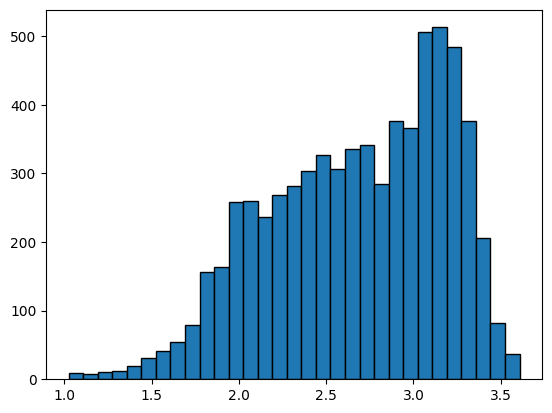

In [52]:
id_list=[]
feature_mat=np.empty((0, 104))
id=-1
for npy in list(npy_files[1:2]):
    rows=[]
    id=id+1
    print(npy)
    case_id = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(npy))))
    print('case_id .....',case_id)
    feat_vect1=np.load(npy)
    ent_vect1=feat_vect1[:,:,:,10,:]

print(ent_vect1.shape)
flattened_array = ent_vect1.flatten()
filtered_array = flattened_array[~np.isnan(flattened_array)]
hist_values, bin_edges = np.histogram(filtered_array, bins='auto')

# Plot the histogram
plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), edgecolor='black')
plt.show()

/app/Data/_Brain/Radiology/_Adult/_Glioma/UCSF/UCSF-PDGM/Feature_extraction/Radiomics_texture/UCSF-PDGM-0021/time01/collage_delta_01/UCSF-PDGM-0021_64_Collage_Edema_T1c_bias_IntStnd_angle_output.npy
case_id ..... UCSF-PDGM-0021
(58, 61, 44, 2)


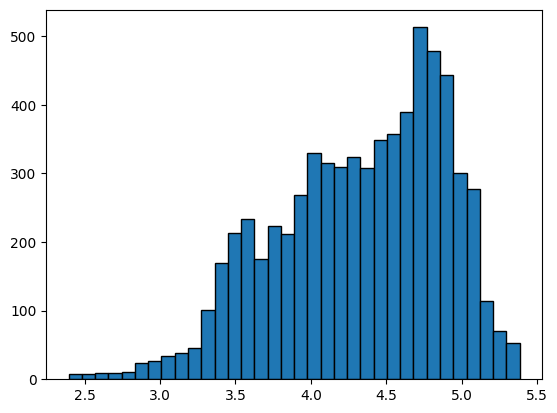

In [49]:
id_list=[]
feature_mat=np.empty((0, 104))
id=-1
for npy in list(npy_files[1:2]):
    rows=[]
    id=id+1
    print(npy)
    case_id = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(npy))))
    print('case_id .....',case_id)
    feat_vect1=np.load(npy)
    ent_vect1=feat_vect1[:,:,:,10,:]

print(ent_vect1.shape)
flattened_array = ent_vect1.flatten()
filtered_array = flattened_array[~np.isnan(flattened_array)]
hist_values, bin_edges = np.histogram(filtered_array, bins='auto')

# Plot the histogram
plt.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), edgecolor='black')
plt.show()

In [27]:
def plot_collage_map2(mri_image, label, angle_output2,  bines, onset_sld):

    # To show lesion mask overlaid on whole MRI
    z=np.where(label==1)
    zz = round(np.mean([np.min(z[2]),np.max(z[2])])) ### choose central slice

    new_image = mri_image[:,:,zz]
    new_label = label[:,:,zz]
 # To show CoLlAGe feature heatmap overlaid on MRI zoomed in to the bounding box
    bb = zz-np.min(z[2])+onset_sld
    which_feature = collageradiomics.HaralickFeature.Entropy
    which_angle = 0
    feature_angle_imbb = angle_output2[:,:,bb,which_feature,which_angle]

    figure = plt.figure(figsize = (10, 10))
    extent = 0, feature_angle_imbb.shape[1], 0, feature_angle_imbb.shape[0]
    min_y_bb = collage.mask_min_y
    max_y_bb = collage.mask_max_y
    min_x_bb = collage.mask_min_x
    max_x_bb = collage.mask_max_x
    plt.imshow(new_image[min_y_bb:max_y_bb,min_x_bb:max_x_bb], cmap=plt.cm.gray, extent=extent)
    plt.imshow(feature_angle_imbb, cmap=plt.cm.jet, alpha=0.5, extent=extent)
    plt.savefig(output_name +'/plot_bb_clg_'+ id_label +'_'+ str(bines)+'_' + name_a + '_'+ pipeline +'.png')